In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yosftag/open-nuro-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.17G/4.17G [00:52<00:00, 84.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yosftag/open-nuro-dataset/versions/1


In [ ]:
pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.0 MB/s eta 0:00:00


/root/.cache/kagglehub/datasets/yosftag/open-nuro-dataset/versions/1/dataset/sub-001/eeg   for subject 1

/root/.cache/kagglehub/datasets/yosftag/open-nuro-dataset/versions/1/dataset/sub-002/eeg    for subject 2,

i have 088 subject


In [ ]:
import os
import mne
import pandas as pd
import json

def read_eeg_data(base_path, num_subjects=88):
    eeg_data = {}  # To store data for each subject

    # Loop over all subjects
    for i in range(1, num_subjects + 1):
        subject_id = f"sub-{i:03d}"  # Create subject ID (e.g., sub-001, sub-002, ..., sub-088)
        subject_path = os.path.join(base_path, subject_id, 'eeg')

        # Check if the subject's EEG directory exists
        if os.path.exists(subject_path):
            subject_info = {}

            # Read the .set file
            set_file = os.path.join(subject_path, f"{subject_id}_task-eyesclosed_eeg.set")
            if os.path.isfile(set_file):
                try:
                    raw = mne.io.read_raw_eeglab(set_file, preload=True)
                    subject_info['eeg'] = raw
                    print(f"Successfully loaded EEG data for {subject_id}")
                except Exception as e:
                    print(f"Error loading EEG data for {subject_id}: {e}")
            else:
                print(f".set file not found for {subject_id}")

            # Read the .tsv file
            tsv_file = os.path.join(subject_path, f"{subject_id}_task-eyesclosed_channels.tsv")
            if os.path.isfile(tsv_file):
                try:
                    channels_info = pd.read_csv(tsv_file, sep='\t')
                    subject_info['channels'] = channels_info
                    print(f"Successfully loaded channel info for {subject_id}")
                except Exception as e:
                    print(f"Error loading channel info for {subject_id}: {e}")
            else:
                print(f".tsv file not found for {subject_id}")

            # Read the .json file
            json_file = os.path.join(subject_path, f"{subject_id}_task-eyesclosed_eeg.json")
            if os.path.isfile(json_file):
                try:
                    with open(json_file, 'r') as f:
                        eeg_metadata = json.load(f)
                        subject_info['metadata'] = eeg_metadata
                        print(f"Successfully loaded metadata for {subject_id}")
                except Exception as e:
                    print(f"Error loading metadata for {subject_id}: {e}")
            else:
                print(f".json file not found for {subject_id}")

            # Store the data for the current subject
            eeg_data[subject_id] = subject_info
        else:
            print(f"EEG directory not found for {subject_id}")

    return eeg_data

# Example usage
base_path = '/root/.cache/kagglehub/datasets/yosftag/open-nuro-dataset/versions/1/dataset'
eeg_data = read_eeg_data(base_path)

# Optionally, access data for a specific subject, for example:
subject_1_data = eeg_data.get('sub-001')


Successfully loaded EEG data for sub-001
Successfully loaded channel info for sub-001
Successfully loaded metadata for sub-001
Successfully loaded EEG data for sub-002
Successfully loaded channel info for sub-002
Successfully loaded metadata for sub-002
Successfully loaded EEG data for sub-003
Successfully loaded channel info for sub-003
Successfully loaded metadata for sub-003
Successfully loaded EEG data for sub-004
Successfully loaded channel info for sub-004
Successfully loaded metadata for sub-004
Successfully loaded EEG data for sub-005
Successfully loaded channel info for sub-005
Successfully loaded metadata for sub-005
Successfully loaded EEG data for sub-006
Successfully loaded channel info for sub-006
Successfully loaded metadata for sub-006
Successfully loaded EEG data for sub-007
Successfully loaded channel info for sub-007
Successfully loaded metadata for sub-007
Successfully loaded EEG data for sub-008
Successfully loaded channel info for sub-008
Successfully loaded metad

Plotting EEG data for sub-001
Using matplotlib as 2D backend.


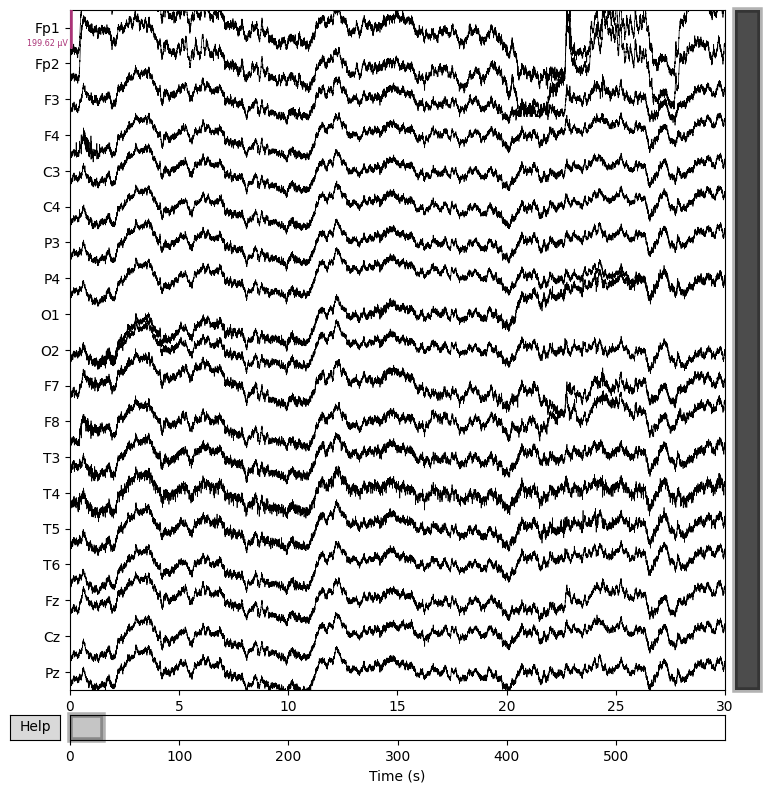

In [ ]:
import matplotlib.pyplot as plt

def visualize_eeg_data(eeg_data, subject_id):
    """
    Visualizes the EEG data for a specific subject.

    Parameters:
    eeg_data (dict): Dictionary containing EEG data for all subjects.
    subject_id (str): The ID of the subject to visualize (e.g., 'sub-001').

    """
    # Get the data for the subject
    subject_info = eeg_data.get(subject_id)

    if subject_info:
        # Access raw EEG data
        raw = subject_info.get('eeg')

        if raw:
            # Plot the raw EEG data (time series)
            print(f"Plotting EEG data for {subject_id}")
            raw.plot(duration=30, n_channels=30, scalings='auto', title=f"EEG Data for {subject_id}")

        else:
            print(f"No EEG data available for {subject_id}")

    else:
        print(f"Subject {subject_id} not found in the EEG data.")

# Example usage: Visualizing EEG for subject 1
visualize_eeg_data(eeg_data, 'sub-001')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 551 samples (1.102 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


<Figure size 1000x600 with 0 Axes>

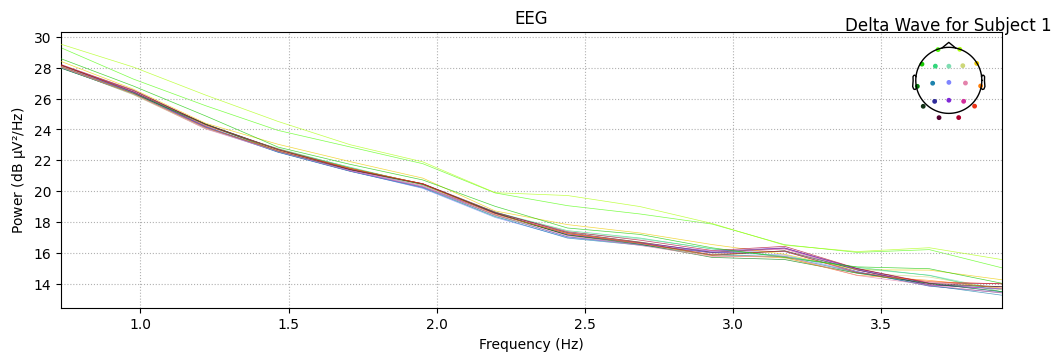

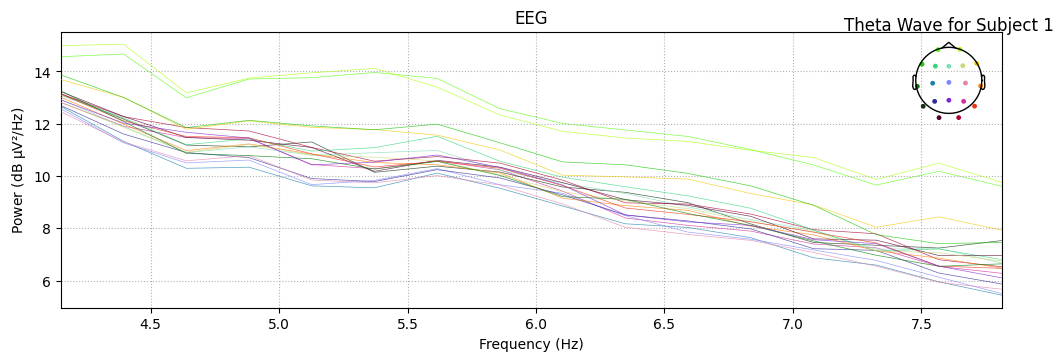

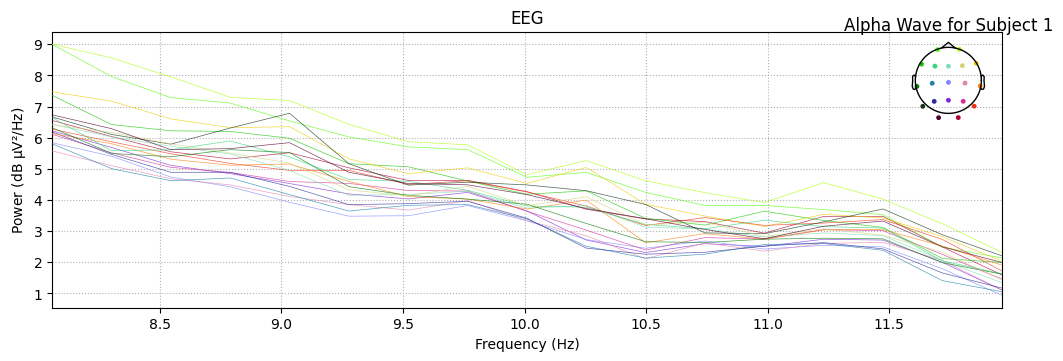

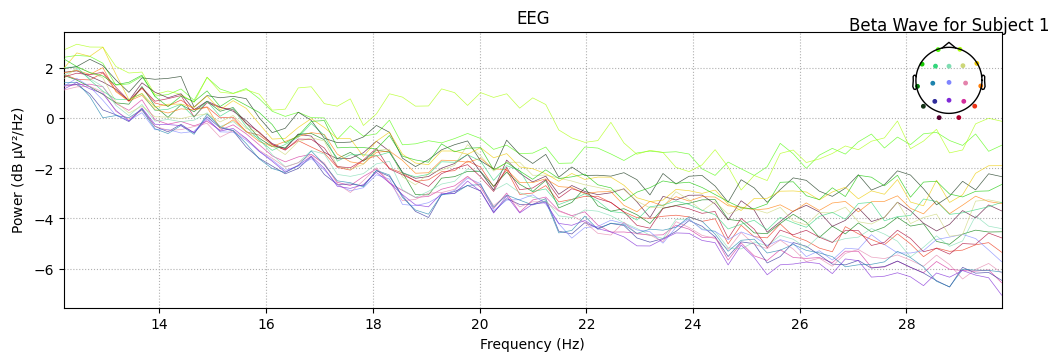

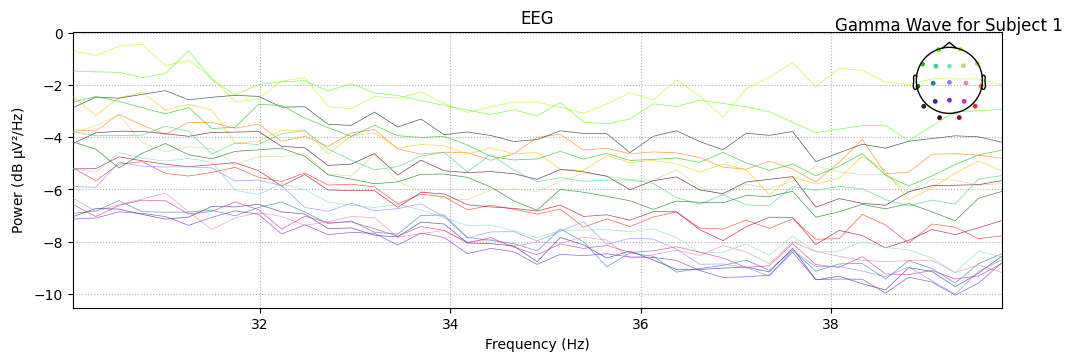

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

def categorize_eeg_waves(raw, subject_id):
    # Apply bandpass filters for each EEG wave category
    # Delta: 0.5 - 4 Hz
    raw_delta = raw.copy().filter(l_freq=0.5, h_freq=4)

    # Theta: 4 - 8 Hz
    raw_theta = raw.copy().filter(l_freq=4, h_freq=8)

    # Alpha: 8 - 12 Hz
    raw_alpha = raw.copy().filter(l_freq=8, h_freq=12)

    # Beta: 12 - 30 Hz
    raw_beta = raw.copy().filter(l_freq=12, h_freq=30)

    # Gamma: 30 - 40 Hz
    raw_gamma = raw.copy().filter(l_freq=30, h_freq=40)

    # Plotting power spectral densities with unique titles for each frequency band
    plt.figure(figsize=(10, 6))

    # Power spectral density for Delta (0.5 - 4 Hz)
    raw_delta.plot_psd(fmin=0.5, fmax=4, show=False)
    plt.title(f"Delta Wave for {subject_id}")

    # Power spectral density for Theta (4 - 8 Hz)
    raw_theta.plot_psd(fmin=4, fmax=8, show=False)
    plt.title(f"Theta Wave for {subject_id}")

    # Power spectral density for Alpha (8 - 12 Hz)
    raw_alpha.plot_psd(fmin=8, fmax=12, show=False)
    plt.title(f"Alpha Wave for {subject_id}")

    # Power spectral density for Beta (12 - 30 Hz)
    raw_beta.plot_psd(fmin=12, fmax=30, show=False)
    plt.title(f"Beta Wave for {subject_id}")

    # Power spectral density for Gamma (30 - 40 Hz)
    raw_gamma.plot_psd(fmin=30, fmax=40, show=False)
    plt.title(f"Gamma Wave for {subject_id}")

    # Show the plots
    plt.show()

# Example usage: Retrieve the raw EEG data for subject 1 and categorize the waves
subject_1_data = eeg_data.get('sub-001')  # Get data for subject 1
if subject_1_data and 'eeg' in subject_1_data:
    raw_eeg_data = subject_1_data['eeg']
    categorize_eeg_waves(raw_eeg_data, 'Subject 1')  # Categorize EEG waves for subject 1
else:
    print("EEG data for subject 1 is not available.")


In [ ]:
import pandas as pd

# Path to your participants.tsv file
participants_path = "/root/.cache/kagglehub/datasets/yosftag/open-nuro-dataset/versions/1/dataset/participants.tsv"

# Read the TSV file
participants_df = pd.read_csv(participants_path, sep='\t')

# Preview the data
print(participants_df.head())

# Create subject_labels dictionary from the 'participant_id' and 'Group' columns
subject_labels = dict(zip(participants_df['participant_id'], participants_df['Group']))

# Example:
print(subject_labels['sub-001'])  # Should print 'A'


  participant_id Gender  Age Group  MMSE
0        sub-001      F   57     A    16
1        sub-002      F   78     A    22
2        sub-003      M   70     A    14
3        sub-004      F   67     A    20
4        sub-005      M   70     A    22
A


In [ ]:
!pip install --upgrade mne

In [ ]:
from mne.time_frequency import psd_welch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define frequency bands
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 40),
}

# Diagnosis mapping: replace this with real data or load from CSV
# subject_labels = {
#     'sub-001': 'AD',
#     'sub-002': 'Control',
#     'sub-003': 'AD',
#     # ...
# }

# Store all results
band_power_data = []

# Loop through subjects
for subject_id, data in eeg_data.items():
    if 'eeg' not in data:
        continue

    raw = data['eeg']
    label = subject_labels.get(subject_id, 'Unknown')

    # Compute PSD using Welch’s method
    psd, freqs = psd_welch(raw, fmin=0.5, fmax=40, n_fft=2048)

    # Average across channels
    psd_mean = np.mean(psd, axis=0)

    # Compute power in each band
    band_powers = {}
    for band_name, (fmin, fmax) in bands.items():
        idx = np.logical_and(freqs >= fmin, freqs <= fmax)
        band_power = np.mean(psd_mean[idx])
        band_powers[band_name] = band_power

    # Store result
    band_power_data.append({
        'subject': subject_id,
        'group': label,
        **band_powers
    })

# Create DataFrame
df = pd.DataFrame(band_power_data)
print(df.head())


ImportError: cannot import name 'psd_welch' from 'mne.time_frequency' (/usr/local/lib/python3.11/dist-packages/mne/time_frequency/__init__.py)

In [ ]:
import numpy as np

small_numbers = np.array([1e-10, 1.1e-10, 1.2e-10])

log_numbers = np.log(small_numbers)
print("Logarithms:", log_numbers)

# Perform calculations in the log domain
log_diff = log_numbers[1] - log_numbers[0]
print("Log difference:", log_diff)

# Convert back to the original scale
diff = np.exp(log_diff)
print("Difference:", diff)

Logarithms: [-23.02585093 -22.93054075 -22.84352937]
Log difference: 0.09531017980432566
Difference: 1.100000000000001
